In [1]:
import json
import requests
import pickle

In [2]:
response = requests.get('http://raw.communitydragon.org/latest/cdragon/tft/ko_kr.json')
with open('data/set5/ko_kr.json', 'wb') as out_file:
     pickle.dump(response.json(), out_file)
        
response = requests.get('http://raw.communitydragon.org/latest/cdragon/tft/en_us.json')
with open('data/set5/en_us.json', 'wb') as out_file:
     pickle.dump(response.json(), out_file)
del response

In [51]:
ko_kr = None
en_us = None
with open('data/set5/ko_kr.json', 'rb') as in_file:
     ko_kr = pickle.load(in_file)
with open('data/set5/en_us.json', 'rb') as in_file:
     en_us = pickle.load(in_file)

In [52]:
def GetItemById(value_json, id: int):
    return list(filter(lambda x: x['id'] == id, value_json['items']))

def GetEnglishNameById(en_us_json, id: int):
    list_items = GetItemById(en_us_json, id)
    if list_items:
        return list_items[0]['name']
    return 'error: %d' % id

def GetKoreanNameById(ko_kr_json, id: int):
    list_items = GetItemById(ko_kr_json, id)
    if list_items:
        return list_items[0]['name']
    return 'error: %d' % id

GetItemById(ko_kr, 1049)

[{'desc': '<TFTShadowItemBonus>전투 시작 시 다음 효과 획득:</TFTShadowItemBonus><li>공격력 +@BonusAD@ 및 주문력 +@BonusSP@</li> <li>기본 공격과 스킬 사용 시 피해량의 @TraitMultiplier@%만큼 체력 회복</li><br><TFTShadowItemPenalty>위 효과는 처치 관여 후 만료되며 다음 처치 관여 시 다시 획득</TFTShadowItemPenalty>',
  'effects': {'BonusAD': 40.0,
   'CritChance': 15.0,
   'Mana': 15.0,
   '{a60806db}': 66.66699981689453,
   '{ae49cc70}': 40.0,
   '{c0c9af7f}': 40.0},
  'from': [1004, 1009],
  'icon': 'ASSETS/Maps/Particles/TFT/Item_Icons/Shadow/S_Hand_of_Justice.dds',
  'id': 1049,
  'name': '복수의 손길'}]

In [73]:
def GetChampionByApiName(value_json, api_name: str):
    for champions in value_json['setData']:
        for champion in champions['champions']:
            if champion['apiName'] == api_name:
                return champion
    return 'error: %d' % id

def GetEnglishNameById(api_name: str):
    return GetChampionByApiName(ko_kr_json, api_name)

def GetKoreanNameById(api_name: str):
    return GetChampionByApiName(ko_kr_json, api_name)

GetChampionByApiName(ko_kr, 'TFT5_Riven')

{'ability': {'desc': '리븐이 검을 강화해 주변 적들을 @StunDuration@초 동안 기절시키고 @ModifiedMagicDamage@의 마법 피해를 입힙니다. 그리고 @EmpowerDuration@초 동안 @BonusAttackDamagePercent*100@%의 추가 공격력을 얻습니다.',
  'icon': 'ASSETS/Characters/Riven/HUD/Icons2D/RivenBladeoftheExile.dds',
  'name': '빛의 검',
  'variables': [{'name': 'StunDuration',
    'value': [0.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]},
   {'name': 'MagicDamage', 'value': [0.0, 100.0, 200.0, 500.0, 0.0, 0.0, 0.0]},
   {'name': 'EmpowerDuration', 'value': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]},
   {'name': 'BonusAttackDamagePercent',
    'value': [0.0,
     0.800000011920929,
     0.8999999761581421,
     1.0,
     0.0,
     0.0,
     0.0]}]},
 'apiName': 'TFT5_Riven',
 'cost': 3,
 'icon': 'ASSETS/UX/TFT/ChampionSplashes/TFT5_Riven.TFT_Set5.dds',
 'name': '리븐',
 'stats': {'armor': 35.0,
  'attackSpeed': 0.800000011920929,
  'critChance': 0.25,
  'critMultiplier': 1.5,
  'damage': 90.0,
  'hp': 800.0,
  'initialMana': 0,
  'magicResist': 35.0,
  'mana': 40.0,
  'range'

# Make Class

In [68]:
import os
from os import path
import json
import requests
from IPython.display import Image, display

In [69]:
class TFTDataManager:
    
    def __init__(self):
        self.static_data_path = 'data/set5/latest/'
        self.static_character_icon_path = self.static_data_path + 'assets/characters/'
        self.latest_url = 'http://raw.communitydragon.org/latest/'
        self.latest_game_url = self.latest_url + 'game/'
        self.latest_character_url = self.latest_game_url + 'assets/characters/'
        self.json_ko_kr = requests.get(self.latest_url + 'cdragon/tft/ko_kr.json').json()
        self.json_en_us = requests.get(self.latest_url + 'cdragon/tft/en_us.json').json()
        
        # makedirs <working_directory>/data/set5/latest/
        if not os.path.exists(self.static_data_path):
            os.makedirs(self.static_data_path)
            
    #
    # 아이템
    #
    
    def GetItemById(self, value_json, item_id: int):
        return list(filter(lambda x: x['id'] == item_id, value_json['items']))

    def GetKoreanItemNameById(self, item_id: int):
        list_items = self.GetItemById(self.json_ko_kr, item_id)
        if list_items:
            return list_items[0]['name']
        return 'error: %d' % item_id

    def GetEnglishItemNameById(self, item_id: int):
        list_items = self.GetItemById(self.json_en_us, item_id)
        if list_items:
            return list_items[0]['name']
        return 'error: %d' % item_id

    def GetItemIconByItemId(self, id: int):
        list_items = self.GetItemById(self.json_en_us, id)
        if list_items:
            icon_url = (os.path.splitext(list_items[0]['icon'])[0] + '.png').lower()
            icon_path, icon_filename = os.path.split(icon_url)
            if path.exists(self.static_data_path + icon_url):
                return Image(filename=self.static_data_path + icon_url)
            else:
                response = requests.get(self.latest_game_url + icon_url)
                if not os.path.exists(self.static_data_path + icon_path):
                    os.makedirs(self.static_data_path + icon_path)
                with open(self.static_data_path + icon_url, 'wb') as out_file:
                    out_file.write(response.content)                
                return Image(response.content)
        return None
    
    #
    # 챔피온
    #
        
    def GetChampionByApiName(self, value_json, api_name: str):
        for champions in value_json['setData']:
            for champion in champions['champions']:
                if champion['apiName'] == api_name:
                    return champion
        return 'error: %d' % id
    
    def GetEnglishChampionNameByApiName(self, api_name: str):
        return self.GetChampionByApiName(self.json_ko_kr, api_name)

    def GetKoreanChampionNameByApiName(self, api_name: str):
        return self.GetChampionByApiName(self.json_en_us, api_name)
    
    def GetChampionIconByApiName(self, api_name: str):
        icon_file_name = (api_name + '_square.tft_set5.png').lower()
        local_file_path = (self.static_character_icon_path + api_name + '/hud/').lower()
        cdragon_url = (self.latest_character_url + api_name + '/hud/' + icon_file_name).lower()
        if path.exists(local_file_path + icon_file_name):
            return Image(filename=local_file_path + icon_file_name)
        else:
            response = requests.get(cdragon_url)
            if not os.path.exists(local_file_path):
                os.makedirs(local_file_path)
            with open(local_file_path + icon_file_name, 'wb') as out_file:
                out_file.write(response.content)                
            return Image(response.content)
        return None
            

In [76]:
from TFTStaticDataManager import TFTStaticDataManager

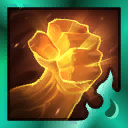

In [77]:
tft_static_data_manager = TFTStaticDataManager()
tft_static_data_manager.GetItemIconByItemId(1049)

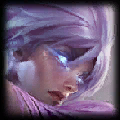

In [78]:
tft_static_data_manager.GetChampionIconByApiName('TFT5_Riven')

In [7]:
import pandas as pd
import numpy as np
import pickle

matches = None
with open('data/set5/matches_0428_0823.txt', 'rb') as in_file:
     matches = pickle.load(in_file)

In [8]:
matches[0]

{'metadata': {'data_version': '5',
  'match_id': 'KR_5158567748',
  'participants': ['rk_UawRP6EvffJYqBYyMZjnz0CnBWxYakV0Q-zsPX3nL2xPyKXeWx4K-ixH68DSb9v6Lm0uMW1UDNg',
   'NeMUOfcLaW9fjiCOFbuM6ONXZLiuCu9BpA0BeO7ymr6BMkvGp-ob0vQaROyCrWSjNVwWqdQyY_nl0A',
   'f_r_7_8ZKsIkCdT-qQm238-7wZYDhS9GBxtQlqr7Y9xnZX8CdNdPqzqWZ5yxlJuQVbV15RuhbEm96w',
   'DlbMPUqRiCyouzcZkJU5mcR_ccRh6fdVPwJ_6hgnAUEx7ZuBSAPdGI6GPe3IaugXEqRfNJdYN0IflQ',
   'LzzdpCkabw4eCRguZMNICIYMDHwHA7CROqOS4l7whW8DisfQL-M27-0ADy54BwHsx2WReaimpP0pKw',
   'iQbmKH4LoAc_WqWWoL1Ep_m7WELTrTnZMSKxYwCGPyU3h1lc-001UuyDl4B8nvtJtDGBiLyfnR73Vw',
   'Aqp5qkVXubr8OpjX-a6h-NA12BkNVs20sqBl8KExhCSlsBshta3LYzR-ZOQ_5MRBEQQPQ1kQXLFsxw',
   '_UB-R1oITzaLUdRmw71LQ3l-Y0x5PP5Xdtms_iDr4YOJO8znPOyFWNOlRlHFdsH24XUbBsYMD7RxFg']},
 'info': {'game_datetime': 1619610693253,
  'game_length': 1137.9573974609375,
  'game_version': 'Version 11.9.372.2066 (Apr 23 2021/10:28:09) [PUBLIC] <Releases/11.9>',
  'participants': [{'companion': {'content_ID': 'd61df27b-9446-43b

In [4]:
!pip install mysql.connector

  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp39-cp39-win_amd64.whl size=247945 sha256=b57770aca01eb4bd154b695383bab2ec0ce7574c0880cb5db16457f41399e808
  Stored in directory: c:\users\vrteam\appdata\local\pip\cache\wheels\7b\14\39\5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql.connector


You should consider upgrading via the 'C:\private\team_fight_tactics_analyze\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
import mysql.connector
import secret

In [9]:
myconn = mysql.connector.connect(host = 'tzfamily.duckdns.org', port=33306, user='dmjang', password=secret.MYSQL_PASSWORD, database='lolchess', auth_plugin='mysql_native_password')